In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = True
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_avalanche",
                      "difficulty" : "standard",
                      "num_tasks" : 5,
                      "train_percentage" : 0.4,
                      "num_val_benchmarks" : 1,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "EWC",
                   "grow_from" : "output",
                   "hessian_percentile" : 90,
                   "grad_percentile" : 90,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 2000,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 1,
                #"lr" : (5e-5, 2e-3),
                "num_epochs" : (3,3),
                "ewc_lambda" : (400,400)
                #"lwf_alpha" : (0.1, 0.9),
                #"lwf_temperature" : (1, 3),
                }

In [3]:
# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [4]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [5]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [6]:
device = get_device(2)

## Get benchmarks

In [7]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [8]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-29 16:16:08,790] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-29 16:16:08 +0200
-- >> Start of training phase << --
100%|██████████| 188/188 [00:02<00:00, 64.95it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6346
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8354
100%|██████████| 188/188 [00:02<00:00, 70.72it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1321
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9594
100%|██████████| 188/188 [00:02<00:00, 67.75it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1018
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9677
-- >> End of training phase << --


[I 2024-07-29 16:16:22,869] Trial 0 finished with value: 95.70053191489369 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 95.70053191489369.


-- >> Start of training phase << --
100%|██████████| 188/188 [00:02<00:00, 72.62it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7313
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8157
100%|██████████| 188/188 [00:02<00:00, 74.52it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1428
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9572
100%|██████████| 188/188 [00:02<00:00, 75.03it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1001
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9683
-- >> End of training phase << --


[I 2024-07-29 16:16:35,708] A new study created in memory with name: Search number 2



--------------------------------------------------
LEARNING TASK 2
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-29 16:16:35 +0200
-- >> Start of training phase << --
100%|██████████| 188/188 [00:02<00:00, 71.43it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7381
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8209
100%|██████████| 188/188 [00:02<00:00, 71.52it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2571
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9452
100%|██████████| 188/188 [00:02<00:00, 70.49it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1894
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9623
-- >> End of training phase << --


[I 2024-07-29 16:16:50,661] Trial 0 finished with value: 92.10280141843978 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 92.10280141843978.


-- >> Start of training phase << --
100%|██████████| 188/188 [00:02<00:00, 69.47it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7709
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8171
100%|██████████| 188/188 [00:02<00:00, 68.30it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2611
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9442
100%|██████████| 188/188 [00:02<00:00, 70.44it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2024
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9573
-- >> End of training phase << --


[I 2024-07-29 16:17:03,920] A new study created in memory with name: Search number 3



--------------------------------------------------
LEARNING TASK 3
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-29 16:17:03 +0200
-- >> Start of training phase << --
100%|██████████| 188/188 [00:02<00:00, 66.10it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5935
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8565
100%|██████████| 188/188 [00:02<00:00, 66.02it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3038
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9412
100%|██████████| 188/188 [00:02<00:00, 66.10it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2511
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9545
-- >> End of training phase << --


[I 2024-07-29 16:17:21,761] Trial 0 finished with value: 91.09501182033097 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 91.09501182033097.


-- >> Start of training phase << --
100%|██████████| 188/188 [00:02<00:00, 65.95it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5570
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8642
100%|██████████| 188/188 [00:02<00:00, 65.62it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2727
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9467
100%|██████████| 188/188 [00:02<00:00, 65.60it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2279
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9600
-- >> End of training phase << --


[I 2024-07-29 16:17:35,493] A new study created in memory with name: Search number 4



--------------------------------------------------
LEARNING TASK 4
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-29 16:17:35 +0200
-- >> Start of training phase << --
100%|██████████| 188/188 [00:02<00:00, 63.82it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6825
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8490
100%|██████████| 188/188 [00:02<00:00, 64.17it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3596
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9426
100%|██████████| 188/188 [00:02<00:00, 64.98it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3044
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9577
-- >> End of training phase << --


[I 2024-07-29 16:17:55,959] Trial 0 finished with value: 89.30674645390069 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 89.30674645390069.


-- >> Start of training phase << --
100%|██████████| 188/188 [00:02<00:00, 62.88it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6959
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8419
100%|██████████| 188/188 [00:02<00:00, 63.30it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3696
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9397
100%|██████████| 188/188 [00:02<00:00, 63.29it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3088
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9563
-- >> End of training phase << --


[I 2024-07-29 16:18:10,053] A new study created in memory with name: Search number 5



--------------------------------------------------
LEARNING TASK 5
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-29 16:18:10 +0200
-- >> Start of training phase << --
100%|██████████| 188/188 [00:03<00:00, 60.43it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7820
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8454
100%|██████████| 188/188 [00:03<00:00, 60.44it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4528
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9341
100%|██████████| 188/188 [00:03<00:00, 60.35it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3799
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9520
-- >> End of training phase << --


[I 2024-07-29 16:18:33,509] Trial 0 finished with value: 88.2418085106383 and parameters: {'num_epochs': 3, 'ewc_lambda': 400}. Best is trial 0 with value: 88.2418085106383.


-- >> Start of training phase << --
100%|██████████| 188/188 [00:03<00:00, 60.48it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7602
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8499
100%|██████████| 188/188 [00:03<00:00, 60.37it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.4447
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9363
100%|██████████| 188/188 [00:03<00:00, 59.79it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.3728
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9543
-- >> End of training phase << --


## Visualize results

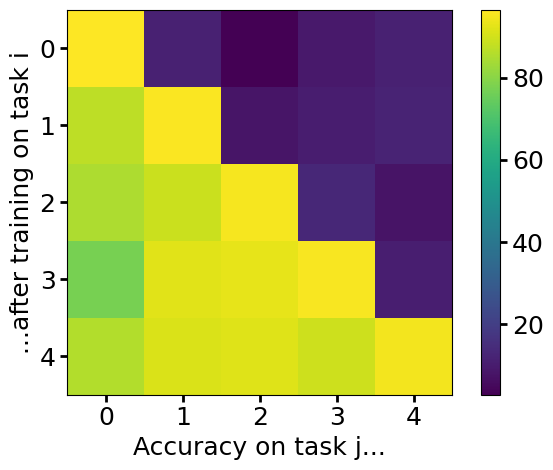

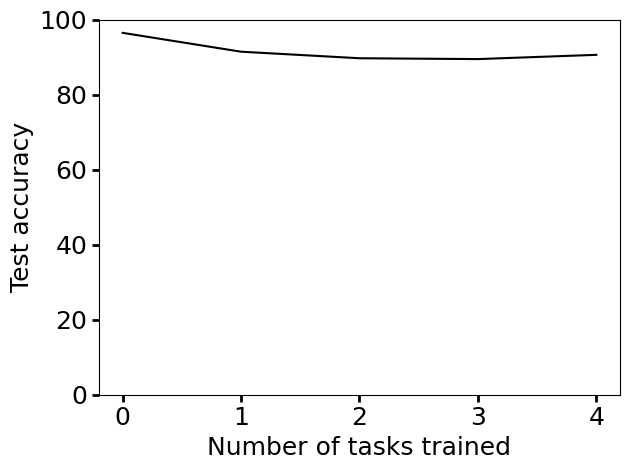

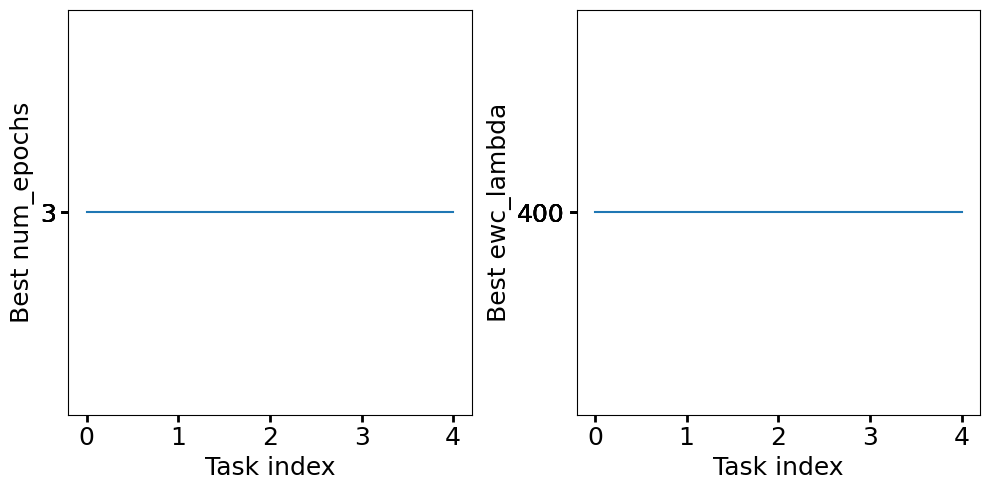

In [9]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [10]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 1

--------------------------------------------------
LEARNING TASK 1
-- >> Start of training phase << --


100%|██████████| 188/188 [00:02<00:00, 72.73it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.8042
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7983
100%|██████████| 188/188 [00:02<00:00, 72.78it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1379
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9594
100%|██████████| 188/188 [00:02<00:00, 75.38it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.0970
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9696
-- >> End of training phase << --

--------------------------------------------------
LEARNING TASK 2
-- >> Start of training phase << --
100%|██████████| 188/188 [00:02<00:00, 71.14it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6907
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8264
100%|██████████| 188/188 [00:02<00:00, 70.06it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.2418
	Top1_Acc_Epoch/train_phase/train_s

## Visualize validation

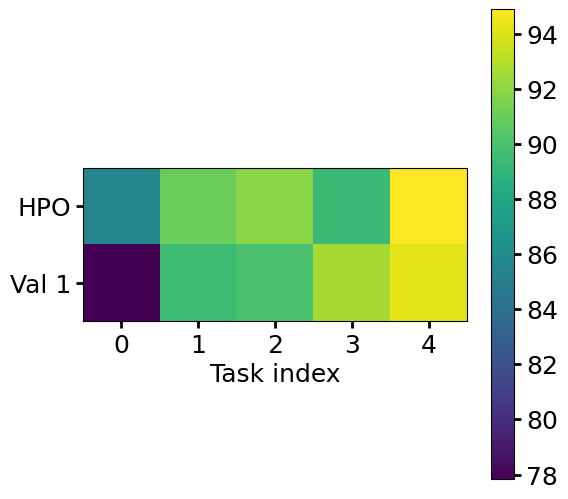

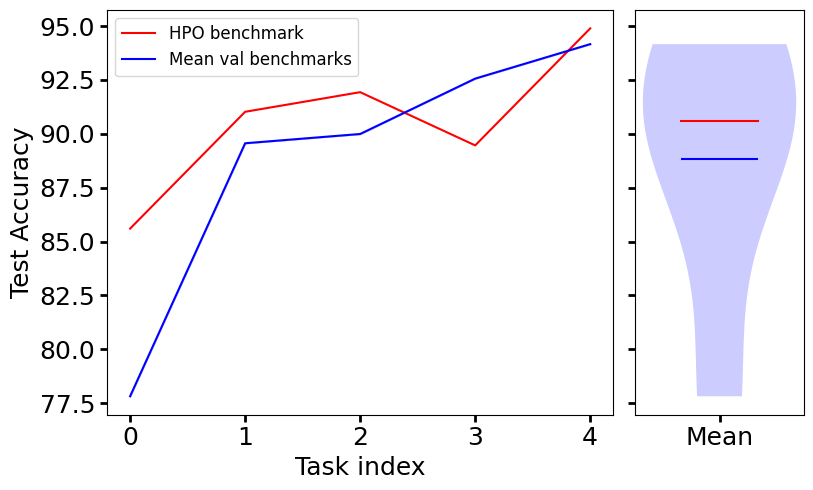

In [11]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [12]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)